# Panorama - Image Stitching

### Preparation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown "1roRw7n9jgWYHTiw7JDspXxWqSGBOx5XJ"
!gdown "193E0n0soFbtlZN7I79xpYHPNjgp2yWH9"

Downloading...
From: https://drive.google.com/uc?id=1roRw7n9jgWYHTiw7JDspXxWqSGBOx5XJ
To: /content/src_left.png
100% 331k/331k [00:00<00:00, 29.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=193E0n0soFbtlZN7I79xpYHPNjgp2yWH9
To: /content/src_right.png
100% 341k/341k [00:00<00:00, 14.0MB/s]


In [ ]:
from matplotlib.pyplot import figure
def display_images(images):

    #Check that image is list type or not.
    if not isinstance(images, list):
        #If not list type
        figure(figsize=(12, 12))
        plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')
        return

    n = len(images)
    cols = int(np.ceil(np.sqrt(n)))
    rows = int(np.ceil(n / cols))
    print("n = ",n)
    print("cols = ",cols)
    print("rows = ",rows)

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    print("axes before: ",len(axes))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    print("axes after: ",len(axes))

    for i in range(n):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        axes[i].axis('on') #hide axis


    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        axes[j].axis('on')

    plt.tight_layout()
    plt.show()

In [ ]:
left = cv2.imread('src_left.png')
right = cv2.imread('src_right.png')

n =  2
cols =  2
rows =  1
axes before:  2
axes after:  2


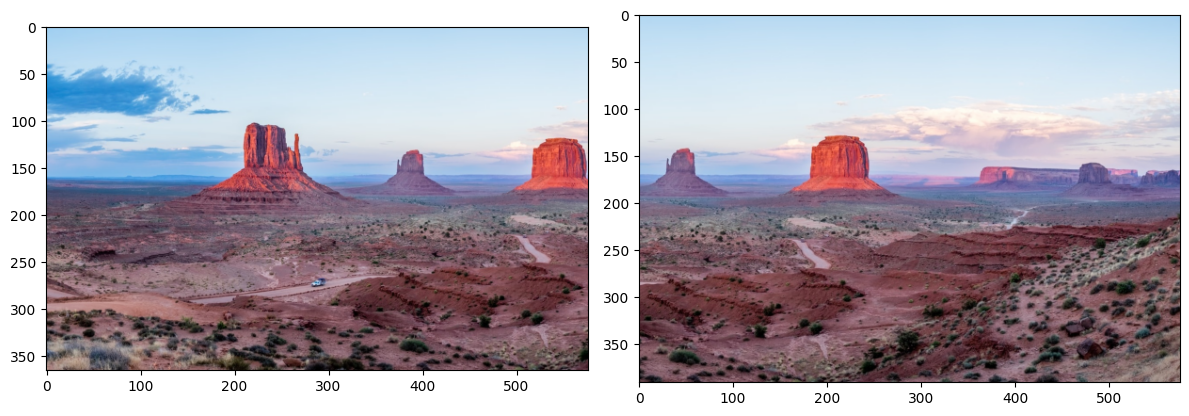

In [ ]:
# Input list type of data to function.
display_images([left,right])

### Feature detection and matching

In [ ]:
# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(left, None)
keypoints2, descriptors2 = sift.detectAndCompute(right, None)

`detectAndCompute` returns two arrays:

- **keypoint**(จุดเด่นที่พบ) represents some important point in source image (location and importance).
- **descriptor**(ข้อมูลที่อธิบายลักษณะเฉพาะของแต่ละจุดเด่น) in some way (depends on algorithm) describes given *keypoint*. This description provides to image changes like translation and rotation and allow us to match same/similar keypoints on different images.

We can easily visualize found *keypoints* with OpenCV.

In [ ]:
keypoints_drawn_left = cv2.drawKeypoints(left, keypoints1, None, color=(0, 0, 255))
keypoints_drawn_right = cv2.drawKeypoints(right, keypoints2, None, color=(0, 0, 255))

array([[[158, 206, 240],
        [158, 206, 240],
        [158, 206, 240],
        ...,
        [181, 216, 242],
        [181, 216, 242],
        [181, 216, 242]],

       [[160, 206, 240],
        [160, 206, 240],
        [160, 206, 240],
        ...,
        [182, 216, 241],
        [182, 216, 241],
        [182, 216, 241]],

       [[160, 206, 240],
        [160, 206, 240],
        [160, 206, 240],
        ...,
        [183, 217, 242],
        [183, 217, 242],
        [183, 217, 242]],

       ...,

       [[179, 146, 138],
        [178, 144, 136],
        [171, 135, 130],
        ...,
        [ 74,  36,  47],
        [ 61,  25,  35],
        [ 64,  28,  38]],

       [[178, 148, 138],
        [182, 151, 142],
        [173, 138, 131],
        ...,
        [ 86,  49,  59],
        [ 82,  46,  56],
        [ 81,  47,  57]],

       [[167, 138, 130],
        [171, 141, 133],
        [166, 132, 125],
        ...,
        [ 98,  61,  71],
        [ 87,  53,  63],
        [ 85,  52,  61]]], dtype=uint8)
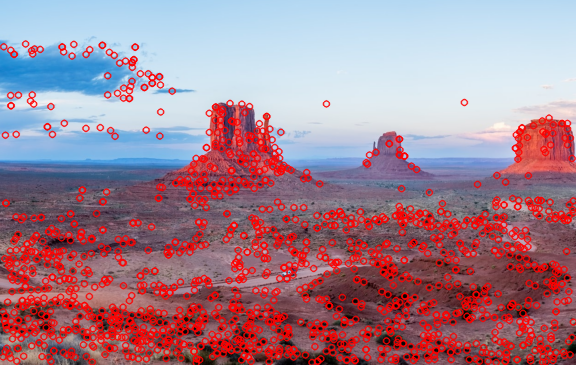

In [ ]:
cv2.cvtColor(keypoints_drawn_left, cv2.COLOR_BGR2RGB)

array([[[177, 215, 242],
        [177, 215, 242],
        [177, 215, 242],
        ...,
        [165, 209, 238],
        [165, 209, 238],
        [165, 209, 238]],

       [[179, 215, 242],
        [179, 215, 242],
        [179, 215, 242],
        ...,
        [168, 209, 239],
        [167, 209, 239],
        [167, 209, 239]],

       [[179, 216, 242],
        [179, 216, 242],
        [179, 216, 242],
        ...,
        [168, 209, 239],
        [168, 209, 239],
        [168, 209, 239]],

       ...,

       [[ 68,  49,  53],
        [ 73,  51,  57],
        [ 71,  46,  52],
        ...,
        [129, 108, 105],
        [134, 112, 107],
        [141, 116, 111]],

       [[ 96,  70,  75],
        [ 90,  62,  67],
        [ 97,  67,  73],
        ...,
        [141, 120, 116],
        [143, 119, 115],
        [149, 125, 120]],

       [[ 78,  54,  56],
        [ 83,  58,  61],
        [ 89,  61,  64],
        ...,
        [156, 132, 128],
        [158, 133, 129],
        [158, 134, 129]]], dtype=uint8)
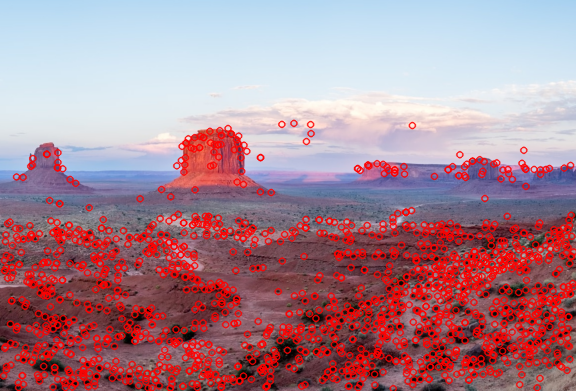

In [ ]:
cv2.cvtColor(keypoints_drawn_right, cv2.COLOR_BGR2RGB)

array([[[240, 206, 158],
        [240, 206, 158],
        [240, 206, 158],
        ...,
        [242, 216, 181],
        [242, 216, 181],
        [242, 216, 181]],

       [[240, 206, 160],
        [240, 206, 160],
        [240, 206, 160],
        ...,
        [241, 216, 182],
        [241, 216, 182],
        [241, 216, 182]],

       [[240, 206, 160],
        [240, 206, 160],
        [240, 206, 160],
        ...,
        [242, 217, 183],
        [242, 217, 183],
        [242, 217, 183]],

       ...,

       [[138, 146, 179],
        [136, 144, 178],
        [130, 135, 171],
        ...,
        [ 47,  36,  74],
        [ 35,  25,  61],
        [ 38,  28,  64]],

       [[138, 148, 178],
        [142, 151, 182],
        [131, 138, 173],
        ...,
        [ 59,  49,  86],
        [ 56,  46,  82],
        [ 57,  47,  81]],

       [[130, 138, 167],
        [133, 141, 171],
        [125, 132, 166],
        ...,
        [ 71,  61,  98],
        [ 63,  53,  87],
        [ 61,  52,  85]]], dtype=uint8)
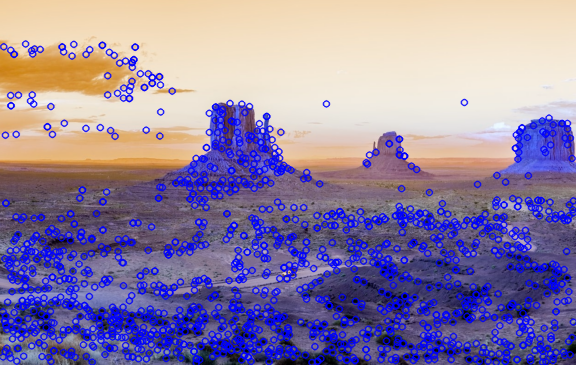

In [ ]:
keypoints_drawn_left

n =  4
cols =  2
rows =  2
axes before:  2
axes after:  4


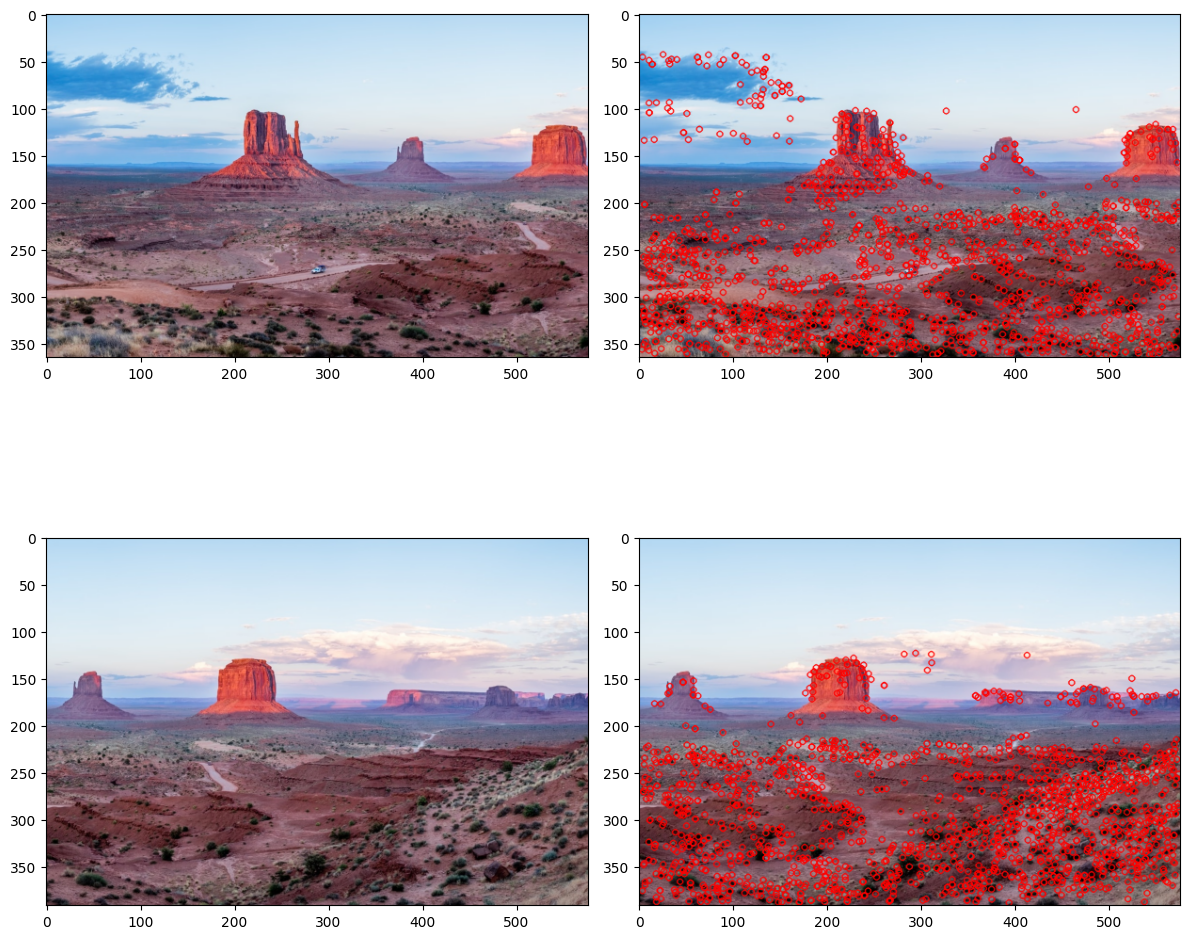

In [ ]:
display_images([left, keypoints_drawn_left, right, keypoints_drawn_right])

Now we need to find which descriptors match each other. We will use OpenCV brute-force matcher.

In [ ]:
print(keypoints_drawn_left)
print(descriptors1)

[[[240 206 158]
  [240 206 158]
  [240 206 158]
  ...
  [242 216 181]
  [242 216 181]
  [242 216 181]]

 [[240 206 160]
  [240 206 160]
  [240 206 160]
  ...
  [241 216 182]
  [241 216 182]
  [241 216 182]]

 [[240 206 160]
  [240 206 160]
  [240 206 160]
  ...
  [242 217 183]
  [242 217 183]
  [242 217 183]]

 ...

 [[138 146 179]
  [136 144 178]
  [130 135 171]
  ...
  [ 47  36  74]
  [ 35  25  61]
  [ 38  28  64]]

 [[138 148 178]
  [142 151 182]
  [131 138 173]
  ...
  [ 59  49  86]
  [ 56  46  82]
  [ 57  47  81]]

 [[130 138 167]
  [133 141 171]
  [125 132 166]
  ...
  [ 71  61  98]
  [ 63  53  87]
  [ 61  52  85]]]
[[  0.   0.   0. ...  66.   5.   8.]
 [ 92. 132.  14. ...  23.  34.   5.]
 [  0.   0.   0. ...   9.  30.  23.]
 ...
 [  0.   0.   0. ...  36.  14.  23.]
 [ 42.  33.   7. ...   4.  11.  14.]
 [ 80.  72.  21. ...   0.   0.   0.]]


In [ ]:
print(len(keypoints_drawn_left))
print(len(descriptors1))
print(len(descriptors1[0]))
print("1571 * 128 = ",np.size(descriptors1))

365
1571
128
1571 * 128 =  201088


In [ ]:
# Create BFMatcher object
#1st params = distance measurement"cv.NORM_L2".
#2nd param = crossCheck which is false by default.
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [ ]:
# Total matches
print(f"Total matches: {len(matches)}")

# Showing example for 5 matches.
for i, match in enumerate(matches[:5]):
    print(f"Match {i + 1}:")
    for j, m in enumerate(match):
        print(f"  Neighbor {j + 1}: queryIdx={m.queryIdx}, trainIdx={m.trainIdx}, distance={m.distance}")

Total matches: 1571
Match 1:
  Neighbor 1: queryIdx=0, trainIdx=1188, distance=342.65289306640625
  Neighbor 2: queryIdx=0, trainIdx=1539, distance=344.7085876464844
Match 2:
  Neighbor 1: queryIdx=1, trainIdx=738, distance=407.662841796875
  Neighbor 2: queryIdx=1, trainIdx=720, distance=409.13690185546875
Match 3:
  Neighbor 1: queryIdx=2, trainIdx=0, distance=336.0089416503906
  Neighbor 2: queryIdx=2, trainIdx=737, distance=354.0875549316406
Match 4:
  Neighbor 1: queryIdx=3, trainIdx=563, distance=317.95281982421875
  Neighbor 2: queryIdx=3, trainIdx=62, distance=347.4794921875
Match 5:
  Neighbor 1: queryIdx=4, trainIdx=1539, distance=301.77142333984375
  Neighbor 2: queryIdx=4, trainIdx=6, distance=329.8211669921875


We can visualise the matches, but there's a lot going on. We will solve this below.

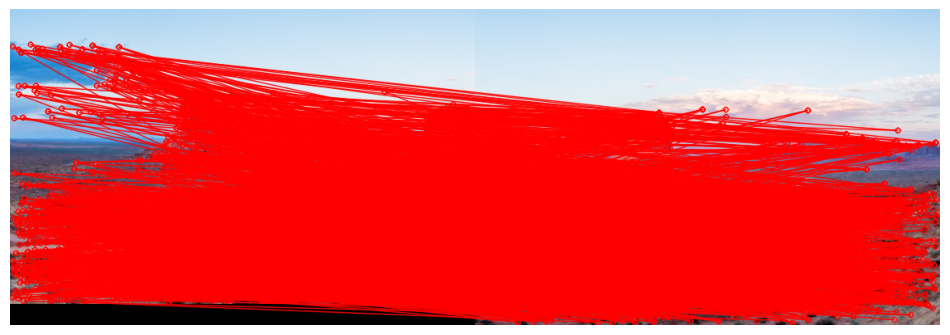

In [ ]:
# Draw only matches for single point won't show.
img_matches = cv2.drawMatchesKnn(left, keypoints1, right, keypoints2, matches, None, matchColor=(0,0,255), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
display_images(img_matches)

We will select only a few of the best matches and visualise again.

In [ ]:
good_matches = []
for m, n in matches:
  if m.distance < 0.75 * n.distance:
    good_matches.append([m])

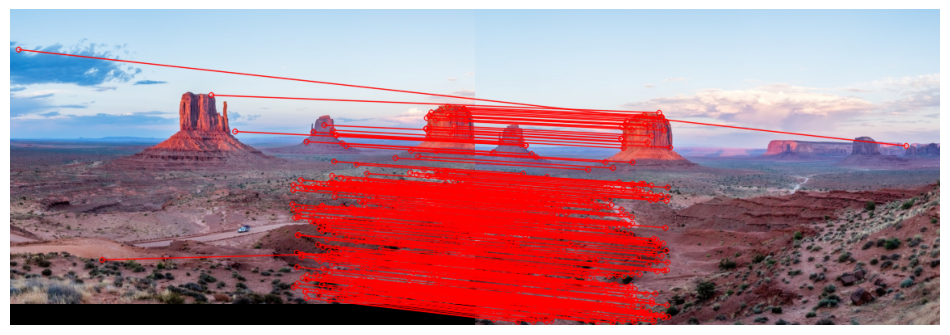

In [ ]:
# Draw matches
img_matches = cv2.drawMatchesKnn(left, keypoints1, right, keypoints2, good_matches, None, matchColor=(0,0,255), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches

display_images(img_matches)

remove outlier point using RANSAC algorithm

In [ ]:
# Extract the matched keypoints
# Each keypoint contains a .pt attribute, which stores the (x, y) coordinates of the keypoint.
src_pts = np.float32([ keypoints1[m[0].queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ keypoints2[m[0].trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

# Apply RANSAC algorithm to remove outliers
#H = homography matrix (is ​​the relationship of pixel positions between two images.)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Filter the good matches using the RANSAC mask
good_matches_ransac = [good_matches[i] for i in range(len(good_matches)) if mask[i]]

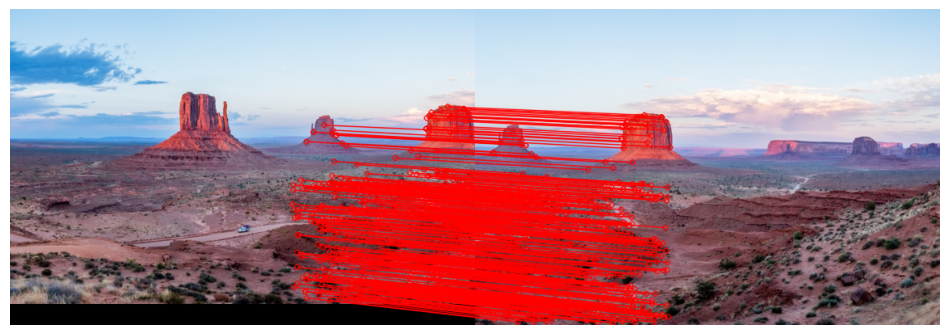

In [ ]:
# Draw matches
img_matches = cv2.drawMatchesKnn(left, keypoints1, right, keypoints2, good_matches_ransac, None, matchColor=(0,0,255), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches

display_images(img_matches)

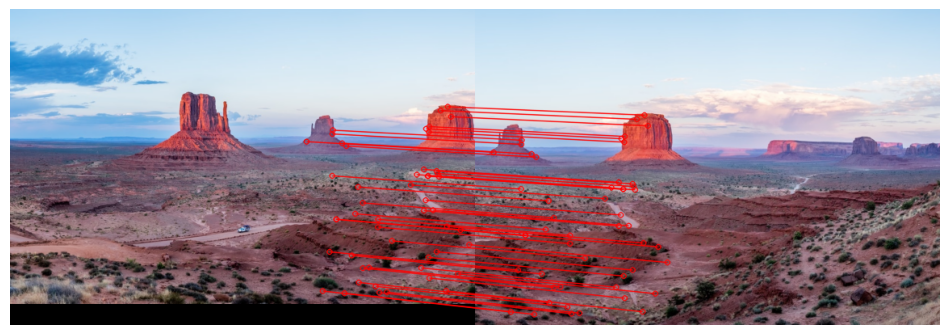

In [ ]:
limit = 50
good_matches_ransac_top = sorted(good_matches_ransac, key = lambda x:x[0].distance)[:limit]
# Draw matches
img_matches = cv2.drawMatchesKnn(left, keypoints1, right, keypoints2, good_matches_ransac_top, None, matchColor=(0,0,255), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
#
display_images(img_matches)

### Perspective transformation and finalization

We will convert the best matches to coordinates on the left and right picture...

In [ ]:
selected_good_matches=good_matches_ransac_top
# selected_good_matches=good_matches_ransac
src_pts = np.float32([ keypoints1[m[0].queryIdx].pt for m in selected_good_matches]).reshape(-1,1,2)
dst_pts = np.float32([ keypoints2[m[0].trainIdx].pt for m in selected_good_matches]).reshape(-1,1,2)

H, _ = cv2.findHomography(np.float32(dst_pts), np.float32(src_pts))

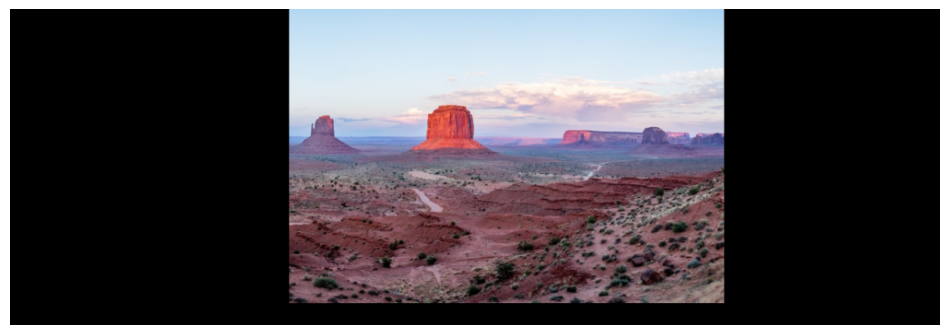

In [ ]:
dim_x = left.shape[1] + right.shape[1]
dim_y = max(left.shape[0], right.shape[0])
dim = (dim_x, dim_y)

warped = cv2.warpPerspective(right, H, dim)
display_images(warped)

In [ ]:
left.shape

(365, 576, 3)

In [ ]:
right.shape

(391, 576, 3)

1152


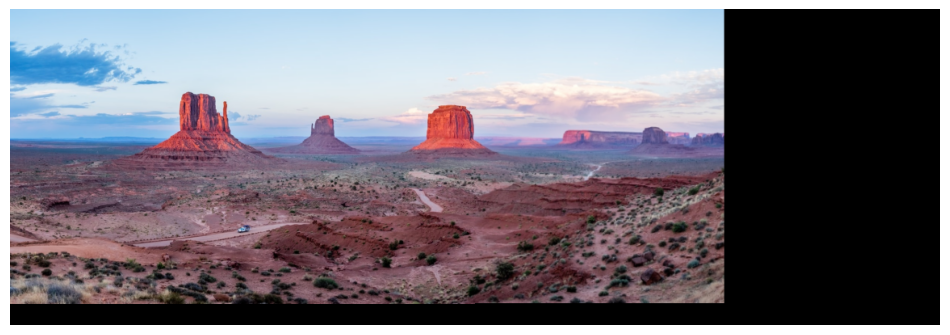

In [ ]:
comb = warped.copy()
print(comb.shape[1])
# combine the two images
comb[0:left.shape[0],0:left.shape[1]] = left
display_images(comb)

Finally we cat put the two images together.

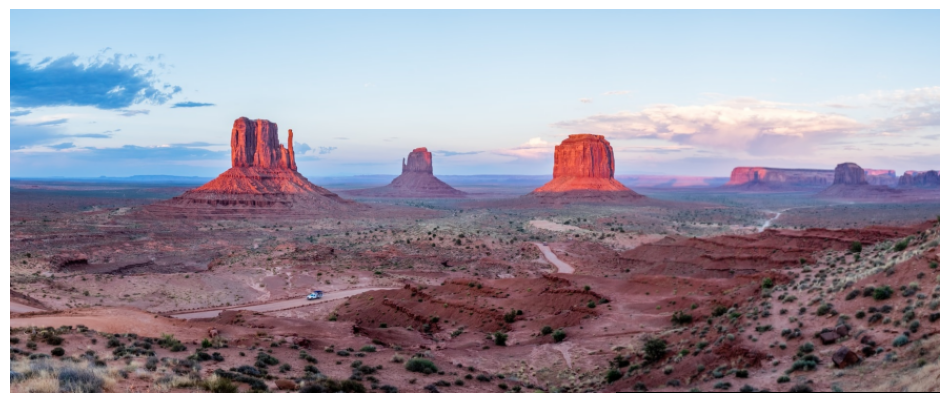

In [ ]:
# crop
y_crop = 884 #1920
x_crop = 365
comb_crop = comb[:x_crop, :y_crop]
display_images(comb_crop)

# Panorama with image stitching.

Creates the mask using query and train images for blending the images,using a gaussian smoothing window/kernel.
        
        Arguments:
            query_image (numpy array of left image)
            train_image (numpy array of right image)
            version (str) == 'left_image' or 'right_image'

## masking idea

In [ ]:
height_panorama=20
width_panorama=40
x_start=10
x_end=20
mask=np.zeros((height_panorama, width_panorama))

(-0.5, 39.5, 19.5, -0.5)

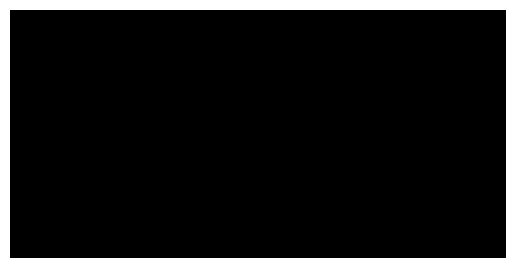

In [ ]:
plt.imshow(mask,cmap='gray')
plt.axis('off')

In [ ]:
linear_gradient=np.linspace(1, 0, x_end-x_start)
linear_gradient

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ])

In [ ]:
blend_area=np.tile(linear_gradient, (height_panorama, 1))
blend_area

array([[1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.7777777

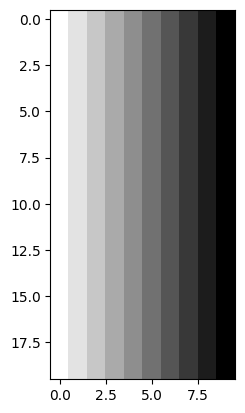

In [ ]:
plt.imshow(blend_area,cmap='gray')

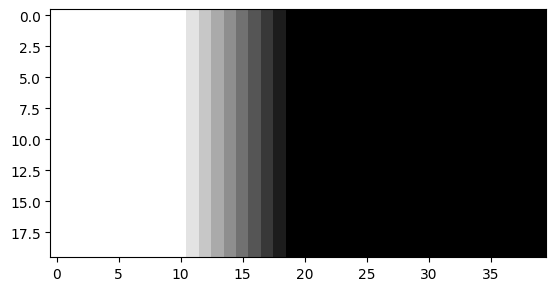

In [ ]:
mask[:,0:x_start]=1
mask[:,x_start:x_end]=blend_area
plt.imshow(mask,cmap='gray')

In [ ]:
def create_mask(query_image, train_image, version):
        smoothing_window_percent = 0.10 # consider increasing or decreasing[0.00, 1.00]
        width_query_photo = query_image.shape[1]
        width_train_photo = train_image.shape[1]
        lowest_width = min(width_query_photo, width_train_photo)
        smoothing_window_size = max(100, min(smoothing_window_percent * lowest_width, 1000))

        height_query_photo = query_image.shape[0]
        height_panorama = height_query_photo
        width_panorama = width_query_photo + width_train_photo

        offset = int(smoothing_window_size / 2)
        barrier = query_image.shape[1] - int(smoothing_window_size / 2)
        mask = np.zeros((height_panorama, width_panorama))
        if version == "left_image":
            mask[:, barrier - offset : barrier + offset] = np.tile(
                np.linspace(1, 0, 2 * offset).T, (height_panorama, 1)
            )
            mask[:, : barrier - offset] = 1
        else:
            mask[:, barrier - offset : barrier + offset] = np.tile(
                np.linspace(0, 1, 2 * offset).T, (height_panorama, 1)
            )
            mask[:, barrier + offset :] = 1
        return cv2.merge([mask, mask, mask])

Blends both query and train image via the homography matrix,
        and ensures proper blending and smoothing using masks created in create_masks()
        to give a seamless panorama.

        Args:
            query_image (numpy array of left image)
            train_image (numpy array of right image)
            homography_matrix (numpy array): Homography to map images to a single plane

In [ ]:
def blending_smoothing(query_image, train_image, homography_matrix):
        height_img1 = query_image.shape[0]
        width_img1 = query_image.shape[1]
        width_img2 = train_image.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 + width_img2

        panorama1 = np.zeros((height_panorama, width_panorama, 3))
        mask1 = create_mask(query_image, train_image, version="left_image")
        panorama1[0 : query_image.shape[0], 0 : query_image.shape[1], :] = query_image
        panorama1 *= mask1
        mask2 = create_mask(query_image, train_image, version="right_image")
        panorama2 = (
            cv2.warpPerspective(
                train_image, homography_matrix, (width_panorama, height_panorama)
            )
            * mask2
        )
        result = panorama1 + panorama2

        # remove extra blackspace
        rows, cols = np.where(result[:, :, 0] != 0)
        min_row, max_row = min(rows), max(rows) + 1
        min_col, max_col = min(cols), max(cols) + 1

        final_result = result[min_row:max_row, min_col:max_col, :]

        return final_result

In [ ]:
result = blending_smoothing(left, right, H)

Display result of panorama with smooth blending.

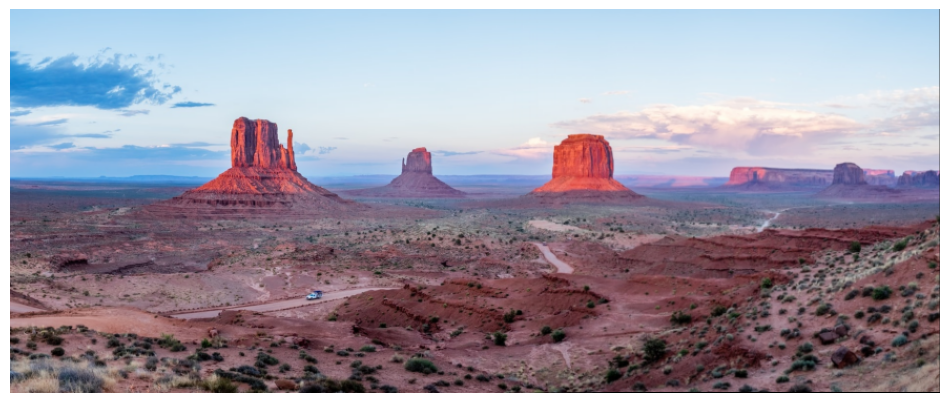

In [ ]:
result2 = np.uint8(result)
display_images(result2)